In [1]:
import pandas as pd
import numpy as np

In [4]:
building_df = pd.read_csv("./input/building_metadata.csv")
weather_train = pd.read_csv("./input/weather_train.csv")
train = pd.read_csv("./input/train.csv")



In [3]:
#building_df

In [4]:
#weather_train.head()

In [5]:
train.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [5]:
test.head()

,row_id,building_id,meter,timestamp
0,0,0,0,2017-01-01 00:00:00
1,1,1,0,2017-01-01 00:00:00
2,2,2,0,2017-01-01 00:00:00
3,3,3,0,2017-01-01 00:00:00
4,4,4,0,2017-01-01 00:00:00


In [6]:
train = train.merge(building_df, left_on = "building_id", right_on = "building_id", how = "left")
#test = test.merge(building_df, left_on = "building_id", right_on = "building_id", how = "left")

In [7]:
train = train.merge(weather_train, left_on = ["site_id", "timestamp"], right_on = ["site_id", "timestamp"], how = "left")
#test = test.merge(weather_train, left_on = ["site_id", "timestamp"], right_on = ["site_id", "timestamp"], how = "left")

In [8]:
del weather_train

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [10]:
train.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01 00:00:00,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,1,0,2016-01-01 00:00:00,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2,2,0,2016-01-01 00:00:00,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
3,3,0,2016-01-01 00:00:00,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
4,4,0,2016-01-01 00:00:00,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0


In [11]:
train["timestamp"]=pd.to_datetime(train["timestamp"])
train["hour"] = train["timestamp"].dt.hour
train["day"] = train["timestamp"].dt.day
train["weekend"] = train["timestamp"].dt.weekday
train["month"] = train["timestamp"].dt.month

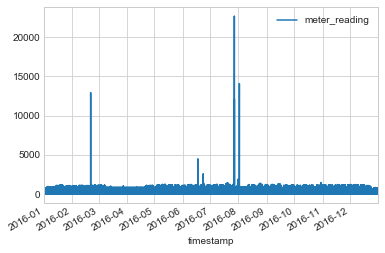

In [12]:
train[train["site_id"]==1].plot("timestamp", "meter_reading")

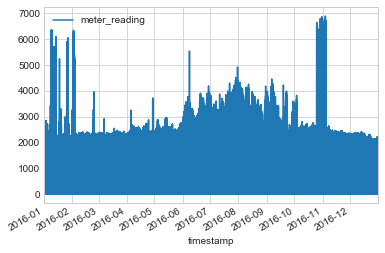

In [13]:
train[train["site_id"]==2].plot("timestamp", "meter_reading")

In [14]:
#train = train.drop("timestamp", axis = 1)

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()
train["primary_use"] = le.fit_transform(train["primary_use"])

In [17]:
categoricals = ["building_id", "primary_use", "hour", "day", "weekend", "month", "meter"]

In [18]:
drop_cols = ["precip_depth_1_hr", "sea_level_pressure", "wind_direction", "wind_speed"]

In [19]:
numericals = ["square_feet", "year_built", "air_temperature", "cloud_coverage",
              "dew_temperature"]

In [20]:
feat_cols = categoricals + numericals

In [21]:
target = np.log1p(train["meter_reading"])

In [22]:
del train["meter_reading"]

In [23]:
train = train.drop(drop_cols + ["site_id", "floor_count"], axis = 1)

In [24]:
# #Based on this great kernel https://www.kaggle.com/arjanso/reducing-dataframe-memory-size-by-65
# def reduce_mem_usage(df):
#     start_mem_usg = df.memory_usage().sum() / 1024**2 
#     print("Memory usage of properties dataframe is :",start_mem_usg," MB")
#     NAlist = [] # Keeps track of columns that have missing values filled in. 
#     for col in df.columns:
#         if df[col].dtype != object:  # Exclude strings            
#             # Print current column type
#             print("******************************")
#             print("Column: ",col)
#             print("dtype before: ",df[col].dtype)            
#             # make variables for Int, max and min
#             IsInt = False
#             mx = df[col].max()
#             mn = df[col].min()
#             print("min for this col: ",mn)
#             print("max for this col: ",mx)
#             # Integer does not support NA, therefore, NA needs to be filled
#             if not np.isfinite(df[col]).all(): 
#                 NAlist.append(col)
#                 df[col].fillna(mn-1,inplace=True)  
                   
#             # test if column can be converted to an integer
#             asint = df[col].fillna(0).astype(np.int64)
#             result = (df[col] - asint)
#             result = result.sum()
#             if result > -0.01 and result < 0.01:
#                 IsInt = True            
#             # Make Integer/unsigned Integer datatypes
#             if IsInt:
#                 if mn >= 0:
#                     if mx < 255:
#                         df[col] = df[col].astype(np.uint8)
#                     elif mx < 65535:
#                         df[col] = df[col].astype(np.uint16)
#                     elif mx < 4294967295:
#                         df[col] = df[col].astype(np.uint32)
#                     else:
#                         df[col] = df[col].astype(np.uint64)
#                 else:
#                     if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
#                         df[col] = df[col].astype(np.int8)
#                     elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
#                         df[col] = df[col].astype(np.int16)
#                     elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
#                         df[col] = df[col].astype(np.int32)
#                     elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
#                         df[col] = df[col].astype(np.int64)    
#             # Make float datatypes 32 bit
#             else:
#                 df[col] = df[col].astype(np.float32)
            
#             # Print new column type
#             print("dtype after: ",df[col].dtype)
#             print("******************************")
#     # Print final result
#     print("___MEMORY USAGE AFTER COMPLETION:___")
#     mem_usg = df.memory_usage().sum() / 1024**2 
#     print("Memory usage is: ",mem_usg," MB")
#     print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
#     return df, NAlist

In [25]:
# Original code from https://www.kaggle.com/gemartin/load-data-reduce-memory-usage by @gemartin
# Modified to support timestamp type, categorical type
# Modified to add option to use float16 or not. feather format does not support float16.
from pandas.api.types import is_datetime64_any_dtype as is_datetime
from pandas.api.types import is_categorical_dtype

def reduce_mem_usage(df, use_float16=False):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        if is_datetime(df[col]) or is_categorical_dtype(df[col]):
            # skip datetime type or categorical type
            continue
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if use_float16 and c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [26]:
train = reduce_mem_usage(train)

Memory usage of dataframe is 2082.19 MB
Memory usage after optimization is: 848.30 MB
Decreased by 59.3%


In [27]:
import pickle

pickle.dump(train, open( "train.p", "wb" ) )



In [28]:
# from sklearn.model_selection import KFold
# from sklearn.metrics import mean_squared_error
# import lightgbm as lgb
# num_folds = 5
# kf = KFold(n_splits = num_folds, shuffle = False, random_state = 42)
# error = 0
# models = []
# for i, (train_index, val_index) in enumerate(kf.split(train)):
#     if i + 1 < num_folds:
#         continue
#     print(train_index.max(), val_index.min())
#     train_X = train[feat_cols].iloc[train_index]
#     val_X = train[feat_cols].iloc[val_index]
#     train_y = target.iloc[train_index]
#     val_y = target.iloc[val_index]
#     lgb_train = lgb.Dataset(train_X, train_y > 0)
#     lgb_eval = lgb.Dataset(val_X, val_y > 0)
#     params = {
#             'boosting_type': 'gbdt',
#             'objective': 'binary',
#             'metric': {'binary_logloss'},
#             'learning_rate': 0.1,
#             'feature_fraction': 0.8,
#             'bagging_fraction': 0.8,
#             'bagging_freq' : 5
#             }
#     gbm_class = lgb.train(params,
#                 lgb_train,
#                 num_boost_round=2000,
#                 valid_sets=(lgb_train, lgb_eval),
#                early_stopping_rounds=20,
#                verbose_eval = 20)
    
#     lgb_train = lgb.Dataset(train_X[train_y > 0], train_y[train_y > 0])
#     lgb_eval = lgb.Dataset(val_X[val_y > 0] , val_y[val_y > 0])
#     params = {
#             'boosting_type': 'gbdt',
#             'objective': 'regression',
#             'metric': {'rmse'},
#             'learning_rate': 0.5,
#             'feature_fraction': 0.8,
#             'bagging_fraction': 0.8,
#             'bagging_freq' : 5
#             }
#     gbm_regress = lgb.train(params,
#                 lgb_train,
#                 num_boost_round=2000,
#                 valid_sets=(lgb_train, lgb_eval),
#                early_stopping_rounds=20,
#                verbose_eval = 20)
# #     models.append(gbm)

#     y_pred = (gbm_class.predict(val_X, num_iteration=gbm_class.best_iteration) > .5) *\
#     (gbm_regress.predict(val_X, num_iteration=gbm_regress.best_iteration))
#     error += np.sqrt(mean_squared_error(y_pred, (val_y)))/num_folds
#     print(np.sqrt(mean_squared_error(y_pred, (val_y))))
#     break
# print(error)